
# **Clicked Ads Classification And Prediction**

Author : Suryansh Mishra 

---
<br>

**Table of Content:**
- Introduction
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
<br>
<br>

## Import Library

In [40]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization style
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [41]:
df = pd.read_csv("C:/Users/91936/Downloads/Clicked Ads Dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [42]:
min(df['Daily Time Spent on Site'])


32.6

In [43]:
max(df['Daily Time Spent on Site'])

91.43

## Data Description
An initial description of the data to understand the characteristics and information contained in it 

| Feature | Description | Type | 
| :- | :- | :- |
| Unnamed: 0 | ID Customers| Numeric | 
| Daily Time Spent on a Site | Time spent by the customers on a site in minutes. | Numeric | 
| Age  | Customer's age in years. | Numeric | 
| Area Income  | Average income of geographical area of costumers. | Numeric | 
| Daily Internet Usage | Time spent by customers on the internet in one day in minutes. | Numeric | 
| Male | Whether or not a constumer was male. | Categorical | 
| Timestamp | What time customers clicked on an Ad or the closed window. | Categorical | 
| Clicked on Ad  | 'No' or 'Yes' is indicated clicking on an Ad. | Categorical | 
| city | City of the costumers. | Categorical | 
| province | Province of the costumers. | Categorical | 
| category | Category of the advertisement. | Categorical |

## 1. Exploratory Data Analysis

### 1.1. Descriptive Statistics

In [44]:
# Show the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


#### Observation:
- Dataset consists of **1000 rows**, **10 features** and **1 Unnamed: 0** column which is the ID customers that need to be **removed**.
- Dataset consists of **3 data types**: int64, float64, and object.
- **Timestamp** feature should be changed into **datetime** data type.
- The target variable which is **Clicked on Ad** is a categorical data and should be **converted to numerical data**.
- There is a missing value in the 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', and 'Male' features
- No duplicate data


In [45]:
# Divide columns to the numerical and categorical column
num = df.select_dtypes(include = ["int64", "float64"]).drop(columns = 'Unnamed: 0')
cat = df.select_dtypes(exclude = ["int64", "float64"]).drop(columns = 'Timestamp').rename(columns = {'Male':'Gender', 
                                                                                                     'category':'Category', 
                                                                                                     'city':'City',
                                                                                                     'province':'Province'})

In [46]:
# Descriptive statistics for numerical column
num_desc = num.describe().round(0).T
num_desc['skewness'] = num.skew()
num_desc

,count,mean,std,min,25%,50%,75%,max,skewness
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0,-0.369756
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0,0.479142
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0,-0.644302
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0,-0.031395


Key Takeaways:
- Judging from the mean and median values that are not so far away, the distribution of data tends to be close to normal
- The majority of users spend **time on a site** is **65 minutes (1 hour)**
- The majority of **daily internet usage** users are **180 minutes (3 hours)**
- Majority of **revenue** users **Rp 399,068,320/year**
- User age range is 19 – 61 years old, with the majority **36 years old**

In [47]:
# Descriptive statistics for categorical column
cat.describe().T

,count,unique,top,freq
Gender,997,2,Perempuan,518
Clicked on Ad,1000,2,Yes,500
City,1000,30,Bandung,64
Province,1000,16,Daerah Khusus Ibukota Jakarta,253
Category,1000,10,Otomotif,112


In [48]:
# Replacing 'Perempuan' with 'Female'
cat['Gender'] = cat['Gender'].replace('Perempuan', 'Female')


In [49]:
# Replacing 'Laki-Laki' with 'Male'
cat['Gender'] = cat['Gender'].replace('Laki-Laki', 'Male')

Key Takeaways:
- The target feature or 'Clicked on Ad' has a balanced number of **Yes** and **No** values
- Accuracy is suitable for balanced data. Accuracy describes how often the model makes correct predictions

### 1.2. Univariate Analysis

#### 1.2.1. Numerical Data

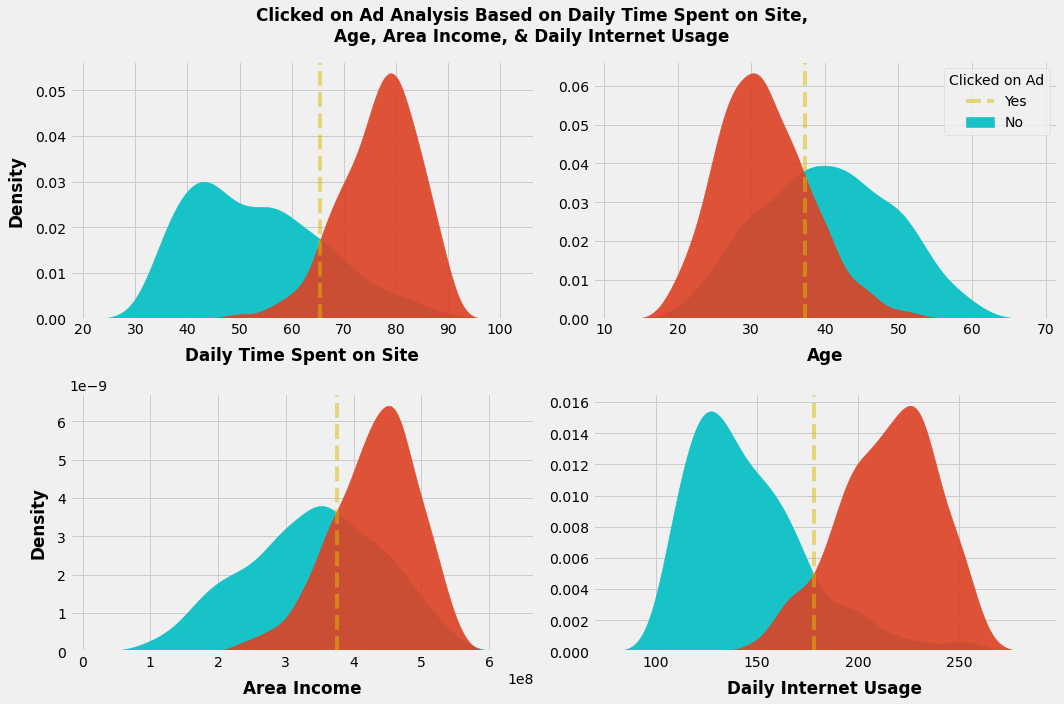

In [50]:
# Adjust image size
plt.figure(figsize = (15, 10))

# Create the num_columns list
num_columns = num.columns

# Data visualization
for i in range(len(num_columns)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data = df[df['Clicked on Ad'] == 'Yes'], x = num_columns[i], color = '#00bfc4', fill = True, alpha = 0.9)
    sns.kdeplot(data = df[df['Clicked on Ad'] == 'No'], x = num_columns[i], color = '#dd4124', fill = True, alpha = 0.9)
    
    # Add vertical line
    if i == 0:
        plt.axvline(x = 65.5, ls = '--', color = '#deba04', alpha = 0.5)
    elif i == 1:
        plt.axvline(x = 37.25, ls = '--', color = '#deba04', alpha = 0.5) 
    elif i == 2:
        plt.axvline(x = 375000000, ls = '--', color = '#deba04', alpha = 0.5) 
    else:
        plt.axvline(x = 178, ls = '--', color = '#deba04', alpha = 0.5) 
        
    # Adjust xlabel
    plt.xlabel(num_columns[i], fontweight = 'bold', labelpad = 10)
    
    # Adjust ylabel
    if i in [0,2]:
        plt.ylabel('Density', fontweight = 'bold', labelpad = 10)
    else:
        plt.ylabel('')
    
    # Add a legend
    if i == 1:
        plt.legend(title = 'Clicked on Ad', labels=['Yes', 'No'], loc = 'upper right')
        
# Add title
plt.suptitle('Clicked on Ad Analysis Based on Daily Time Spent on Site,\nAge, Area Income, & Daily Internet Usage', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- The **more time spent** on the site or the internet, the **less likely** a customer will click on an ad.
- The **older** the customer, the **more likely** a customer will click on an ad.
- The **higher** area income of customer, the **less likely** a customer will click on an ad.

#### 1.2.2. Categorical Data

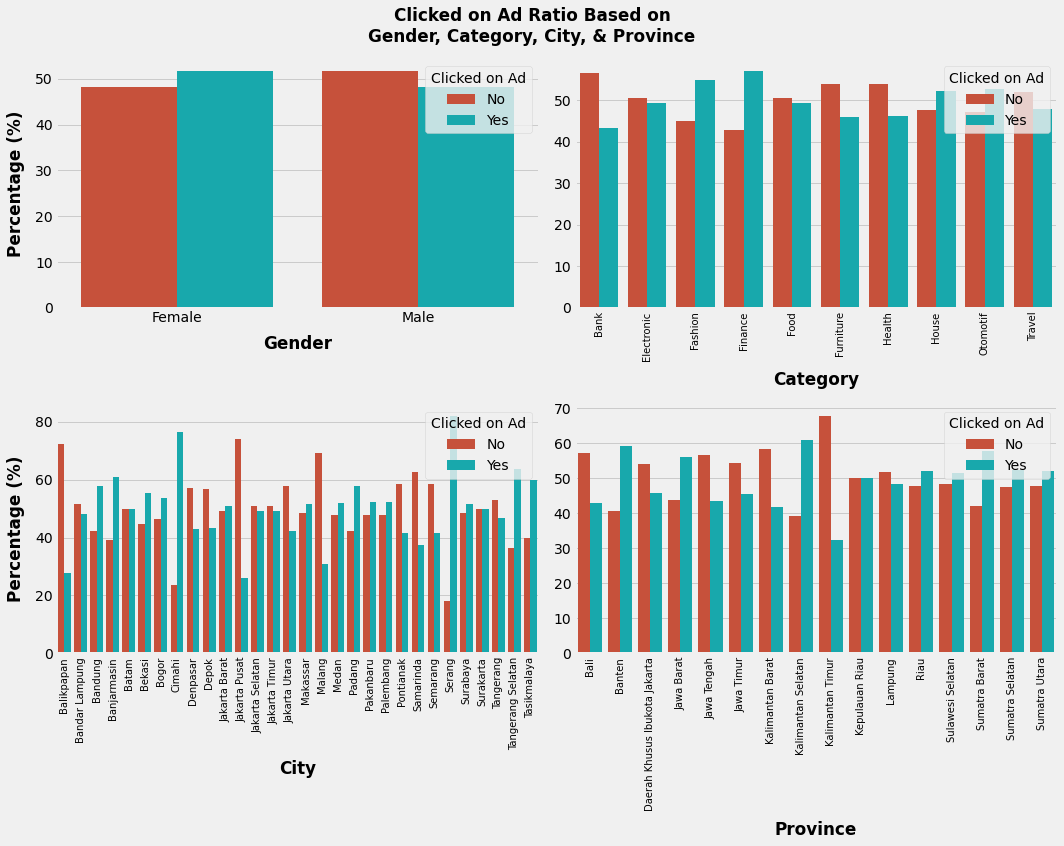

In [51]:
# image size
plt.figure(figsize = (15, 12))


cat_columns = ['Gender', 'Category', 'City', 'Province']

# Custom palette
palette = ['#dd4124', '#00bfc4',]

# Data visualization
for i in range(len(cat_columns)):
    plt.subplot(2, 2, i+1)
    cat_total = cat.groupby([cat_columns[i], 'Clicked on Ad']).size().reset_index(name = 'Total')
    cat_total_customer = cat.groupby(cat_columns[i]).size().reset_index(name = 'Total_Customer')
    cat_total = cat_total.merge(cat_total_customer)
    cat_total['Ratio'] = round(cat_total['Total']/cat_total['Total_Customer'] * 100, 2)
    sns.barplot(data = cat_total, x = cat_columns[i], y = 'Ratio', hue = 'Clicked on Ad', palette = palette)
    
    # Adjust xlabel
    plt.xlabel(cat_columns[i], fontweight = 'bold', labelpad = 10)
    
    # Adjust ylabel
    if i in [0,2]:
        plt.ylabel('Percentage (%)', fontweight = 'bold', labelpad = 10)
    else:
        plt.ylabel('')
    
    # Adjust xticks
    if i in [1,2,3]:
        plt.xticks(fontsize = 10, rotation = 90)
        
    # Add legend
    plt.legend(title = 'Clicked on Ad', loc = 'upper right')
        
# Add title
plt.suptitle('Clicked on Ad Ratio Based on\nGender, Category, City, & Province', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- **(female)** has a slightly higher probability of **clicking** on Ad than Laki-laki (male).
- Each ad category has a fairly similar click ratio with the **highest** ad category clicked being **Finance** and the **lowest** being **Bank**.
- The city with the **highest** click ratio is **Serang** and the **lowest** is **Jakarta Pusat**.
- The top 3 provinces with the **highest** click ratio are **Kalimantan Selatan**, **Banten**, **Sumatra Barat**.

### 1.3. Bivariate Analysis

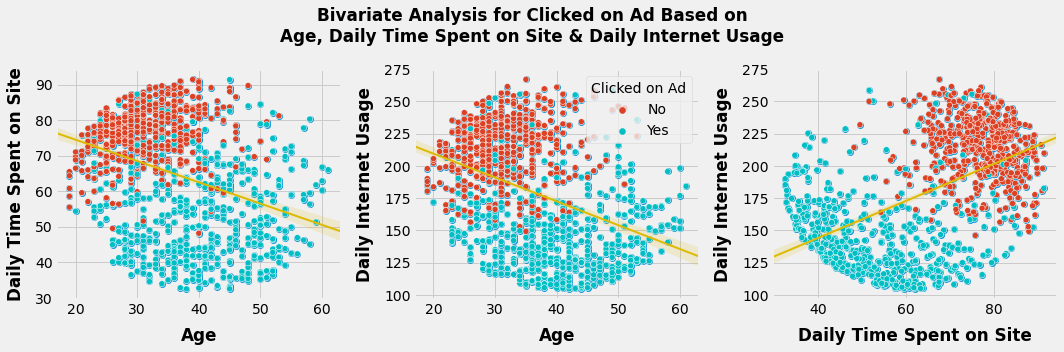

In [52]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Custom palette
palette = ['#dd4124', '#00bfc4',]

# Create trend line
sns.regplot(data = df, x = 'Age', y = 'Daily Time Spent on Site', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[0])
sns.regplot(data = df, x = 'Age', y = 'Daily Internet Usage', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[1])
sns.regplot(data = df, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[2])

# Data visualization
sns.scatterplot(data = df, x = 'Age', y = 'Daily Time Spent on Site', hue = 'Clicked on Ad', palette = palette, ax = axs[0], legend = None)
sns.scatterplot(data = df, x = 'Age', y = 'Daily Internet Usage', hue = 'Clicked on Ad', palette = palette, ax = axs[1])
sns.scatterplot(data = df, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', hue = 'Clicked on Ad', palette = palette, ax = axs[2], legend = None)

# Adjust x and y label
axs[0].set_xlabel ('Age', fontweight = 'bold', labelpad = 10)
axs[0].set_ylabel ('Daily Time Spent on Site', fontweight = 'bold', labelpad = 10)
axs[1].set_xlabel ('Age', fontweight = 'bold', labelpad = 10)
axs[1].set_ylabel ('Daily Internet Usage', fontweight = 'bold', labelpad = 10)
axs[2].set_xlabel ('Daily Time Spent on Site', fontweight = 'bold', labelpad = 10)
axs[2].set_ylabel ('Daily Internet Usage', fontweight = 'bold', labelpad = 10)
    
# Add title
plt.suptitle('Bivariate Analysis for Clicked on Ad Based on\nAge, Daily Time Spent on Site & Daily Internet Usage', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- Age with Daily Time Spent on Site or Daily Internet Usage have a **negative correlation**. This means that the **older** the customer, the **less time** they spend on the site or the internet.
- Meanwhile, Daily Time Spent on Site and Daily Internet Usage have a **positive correlation**. This means that the **more time** spent on the internet, the **more time** will be spent on the site too.

Key Takeways:
- **Daily Time Spent**
    - **Users who rarely spend time on a site (less than 1 hour) have the potential to click on larger ads**
- **Daily Internet Usage**
    - **Users who rarely use the internet have the potential to click on larger ads than users who use the internet frequently**. Internet users who rarely use the internet may have greater curiosity about the products or services offered through advertising. Because they are less familiar with the internet, they may feel attracted to advertising and want to know more about the product. Another possibility is that due to the limited internet access to the information offered, when users find an interesting ad, they are more likely to click on the ad to get more complete information.
- **Age**
    - Older users have greater potential to click on ads. It's possible that younger internet users are more familiar with technology and the internet, so they may be better able to find the information they need through sources other than advertising. They may also be more critical in assessing ads, and prefer to avoid ads that are too intrusive or irrelevant.

### 1.4. Multivariate Analysis

#### 1.4.1. Pearson Correlation

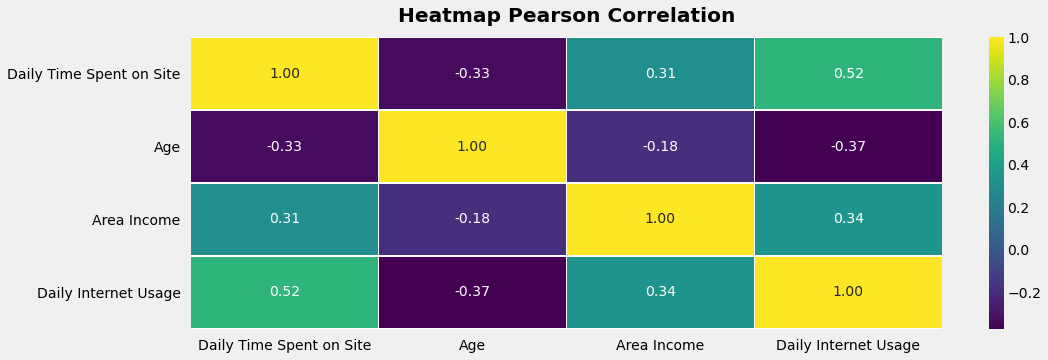

In [53]:
# Adjust image size
plt.figure(figsize = (15, 5))

# Create heatmap
sns.heatmap(num.corr(), cmap = 'viridis', annot = True, fmt='.2f', linewidths = 0.5)
plt.title('Heatmap Pearson Correlation', fontweight = 'bold', pad = 15)
plt.tick_params(pad = 10)
plt.show()

#### Observation:
- Based on the heatmap above, there are **no features** that are **redundant** or have high correlation (>= 0.7) between them. Therefore, all features can be used for modeling. However, by using Pearson correlation, we cannot determine the relationship between features and the target variable because the **target variable is categorical data**. Therefore, we will use **PPS (Predictive Power Score)** to calculate the relationship between features and the target variable.

#### 1.4.2. Predictive Power Score

In [54]:
# Install ppscore package
!pip install -U ppscore

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
# Change data type to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [56]:
# Feature Engineering from the Timestamp column
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.week
df['Day'] = df['Timestamp'].dt.day

In [57]:
# Show the data
df.drop(columns = 'Timestamp', inplace = True)
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,12,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,4,14,4
2,2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,3,10,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,1,1,10
4,4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,6,22,3


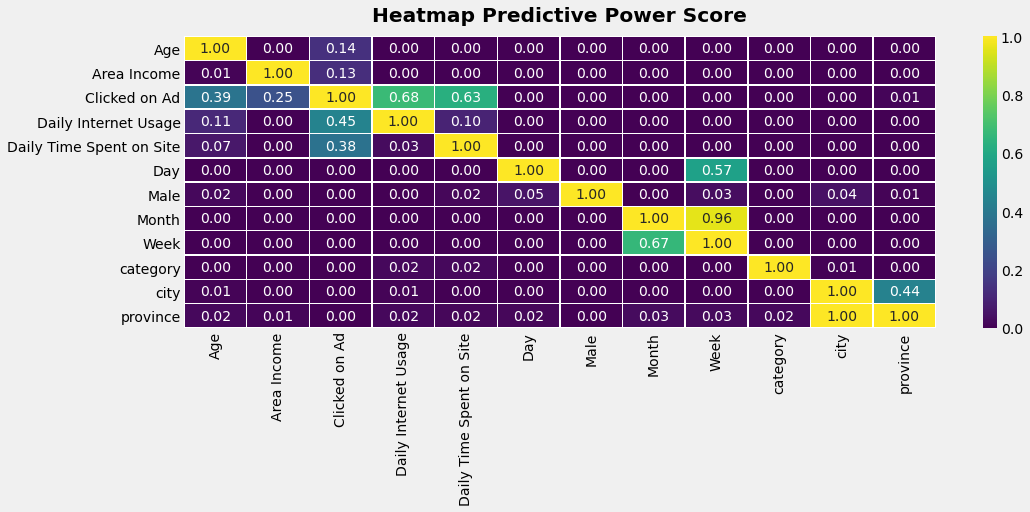

In [58]:
# Import library
import ppscore as pps

# Adjust image size
plt.figure(figsize = (15, 5))

# Make pivot table ppscore
df_pps = pps.matrix(df.drop(columns = 'Unnamed: 0'))
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')

# Create heatmap
sns.heatmap(matrix_df, cmap = 'viridis', annot = True, fmt='.2f', linewidths = 0.5)
plt.title('Heatmap Predictive Power Score', fontweight = 'bold', pad = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### Observation:
- Based on the heatmap above, the features that are **related** to the target variable (Clicked on Ad) and will be used for modeling are **Age**, **Area Income**, **Daily Internet Usage**, and **Daily Time Spent on Site** because they have **predictive power score >= 0.05** with the target variable.

## 2. Data Preprocessing

In [59]:
# Feature selection
data = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']]

In [60]:
# Show the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Clicked on Ad             1000 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB


### 2.1. Handling Null Values

In [61]:
# Show number of null values
data.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Clicked on Ad                0
dtype: int64

We will impute null values in the **Area Income** column with **median** because it has a **skewed** distribution and **Daily Internet Usage** and **Daily Time Spent on Site** columns with **mean** because they have almost **symmetric** distributions.

In [62]:
# Imputation with median
data['Area Income'].fillna(data['Area Income'].median(), inplace = True)

In [63]:
# Imputation with mean
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(), inplace = True)
data['Daily Time Spent on Site'].fillna(data['Daily Time Spent on Site'].mean(), inplace = True)

In [64]:
# Show number of null values
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Clicked on Ad               0
dtype: int64

### 2.2. Duplicated Data

In [65]:
# Show duplicated data
data.duplicated().sum()

0

Dataset **does not have** duplicated data

### 2.3. Feature Encoding

In [66]:
# Encode the categorical column
data['Clicked on Ad'] = data['Clicked on Ad'].replace({'No': 0, 'Yes': 1})

In [67]:
# Show the data
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,432837300.0,256.09,0
1,80.23,31,479092950.0,193.77,0
2,69.47,26,418501580.0,236.50,0


### 2.4. Split Data

In [68]:
# Import library
from sklearn.model_selection import train_test_split

# Split data to features and target
X = data.drop(columns = 'Clicked on Ad')
y = data['Clicked on Ad']

# Split data to the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Show the data train and test size
print(f'Data train : {X_train.shape[0]} rows')
print(f'Data test  : {X_test.shape[0]} rows')

Data train : 700 rows
Data test  : 300 rows


### 2.5. Handling Outliers

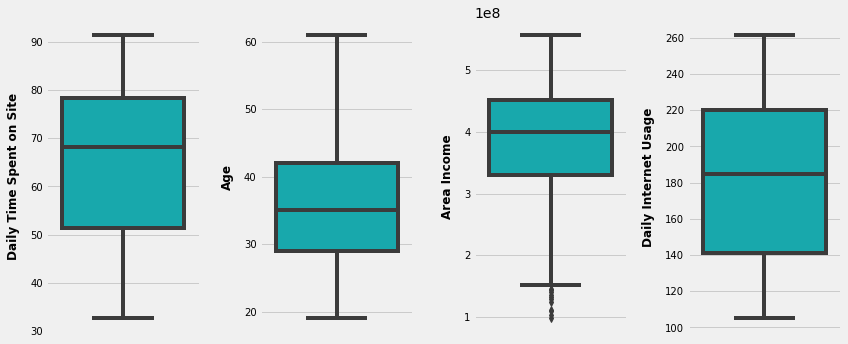

In [69]:
# Create the train_columns variable
train_columns = X_train.columns

# Adjust the image size
plt.figure(figsize = (12, 5))

# Menampilkan boxplot kolom numerik
for i in range(0, len(train_columns)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y = X_train[train_columns[i]], color = '#00bfc4', orient = 'v')
    plt.ylabel(train_columns[i], fontweight = 'bold', fontsize = 12, labelpad = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

# Show the graph
plt.show()

In [70]:
# Remove the outliers using IQR method
print("Number of rows:\n---------------")
print(f"BEFORE outliers removed: {len(X_train)}")

# Merge the data train
train = X_train.join(y_train)

# Calculate IQR
q1 = np.percentile(train['Area Income'], 25)
q3 = np.percentile(train['Area Income'], 75)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the data
train = train[(train['Area Income'] >= lower_bound) & (train['Area Income'] <= upper_bound)]

# Split the data train
X_train = train.drop(columns = 'Clicked on Ad')
y_train = train['Clicked on Ad']
    
print(f"AFTER outliers removed: {len(X_train)}")

Number of rows:
---------------
BEFORE outliers removed: 700
AFTER outliers removed: 689


### 2.6. Normalization

In [71]:
# Import library
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Normalization process
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Data Modeling

### 3.1. Model Evaluation Function

The primary metrics that will be used is **accuracy**, because the dataset has **balanced number of labels**.

In [72]:
# Import library
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import time

# Create the evaluate_model function
def evaluate_model(X_train, X_test, y_train, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy'):
    gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0)
    
    start = time.time()
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    end = time.time()

    return [accuracy, precision, recall, (end-start)]

# Determine hyperparameters to be optimized
grid_parameters = [
    
        { # Logistic regression
        'penalty' : ['l2','l1','elasticnet'],
        'C' : [0.0001, 0.001, 0.002],
        'solver' : ['liblinear', 'newton-cg','lbfgs'],
        'multi_class' : ['multinomial']
    },  
        { # Decision Tree
        'max_features': ['auto', 'sqrt'],
        'max_depth' : [2, 4, 6, 7, 8],
        'min_samples_split' : [2, 5], 
        'min_samples_leaf' : [1, 2] 
    },     
        { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },        
        { # AdaBoost
        'learning_rate': [0.001, 0.01, 1],
        'n_estimators': [20, 60, 80],
        'algorithm' : ['SAMME.R', 'SAMME']
    },  
        { # XGBoost   
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'loss': ['log_loss', 'exponential']
    },
        { # Extra Trees
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
        { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
]

### 3.2. Before Normalization

#### 3.2.1. Initiate Model

In [73]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Instantiation machine learning algorithm
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
et = ExtraTreesClassifier (random_state = 42)
knn = KNeighborsClassifier()

# Create the models list
models = [lr, dt, rf, ada, xgb, et, knn]

#### 3.2.2. Model Evaluation & Create Dataframe

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize an empty list to store metrics for each model
models_preds = []

for i, model in enumerate(models):
    hyperparameters = grid_parameters[i]
    
    # Start timing
    start_time = time.time()
    
    # Perform randomized search for hyperparameter tuning
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=hyperparameters,
        n_iter=10,  
        cv=2,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    # Fit model and capture best estimator
    randomized_search.fit(X_train, y_train)
    best_model = randomized_search.best_estimator_
    
    # Get predictions on test data
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')  
    time_elapsed = time.time() - start_time
    
    # Append metrics to models_preds
    models_preds.append([acc, prec, recall, time_elapsed])

# Now create the DataFrame
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'ExtraTrees', 'KNeighbors']})
df_result = pd.DataFrame(data=models_preds, columns=['Acc', 'Prec', 'Recall', 'Time Elapsed'])
df_metrics = df_models.join(df_result)
df_metrics = df_metrics.sort_values('Acc', ascending=False, ignore_index=True)

# Show the DataFrame
df_metrics


,Model,Acc,Prec,Recall,Time Elapsed
0,Random Forest,0.946667,0.946765,0.946667,19.599633
1,ExtraTrees,0.946667,0.948014,0.946667,16.151096
2,Decision Tree,0.943333,0.944370,0.943333,0.856175
3,XGBoost,0.943333,0.943876,0.943333,16.968608
4,AdaBoost,0.940000,0.940271,0.940000,1.635255
5,KNeighbors,0.683333,0.694481,0.683333,0.617316
6,Logistic Regression,0.486667,0.236844,0.486667,32.435667


#### Observation:
- **Tree-based** models have **far better performance** than **distance-based** models.
- The **best** performance models are  **Random Forest**,  **Extra Trees** , **Decision Tree**, with the highest accuracy.
- The **worst** performance models are **KNNeigbors** and **Logistic Regression** with the lowest accuracy.
- The **longest** time elapsed occured on **Random Forest**, **Extra Trees** , **logistic regression** and **XGBoost** models.

### 3.3. After Normalization

#### 3.3.1. Model Evaluation

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize an empty list to store metrics for each model
models_preds_scaled = []

# Hyperparameter tuning with scaled data
for i, model in enumerate(models):
    hyperparameters = grid_parameters[i]
    
    # Start timing
    start_time = time.time()
    
    # Perform randomized search for hyperparameter tuning
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=hyperparameters,
        n_iter=10,  
        cv=5,       
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    # Fit model with scaled data and capture best estimator
    randomized_search.fit(X_train_scaled, y_train)
    best_model = randomized_search.best_estimator_
    
    # Get predictions on scaled test data
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')   
    time_elapsed = time.time() - start_time
    
    # Append metrics to models_preds_scaled
    models_preds_scaled.append([acc, prec, recall, time_elapsed])



#### 3.3.2. Create Dataframe

In [86]:
# Now create the DataFrame
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'ExtraTrees', 'KNeighbors']})
df_result_scaled = pd.DataFrame(data=models_preds_scaled, columns=['Acc (Normalized)', 'Prec (Normalized)', 'Recall (Normalized)', 'Time Elapsed (Normalized)'])
df_metrics_scaled = df_models.join(df_result_scaled)
df_metrics_scaled = df_metrics_scaled.sort_values('Acc (Normalized)', ascending=False, ignore_index=True)

# Show the DataFrame
df_metrics_scaled


,Model,Acc (Normalized),Prec (Normalized),Recall (Normalized),Time Elapsed (Normalized)
0,Random Forest,0.960000,0.960096,0.960000,37.925888
1,Decision Tree,0.953333,0.954109,0.953333,0.596078
2,AdaBoost,0.950000,0.950029,0.950000,3.958569
3,KNeighbors,0.950000,0.952523,0.950000,0.344948
4,ExtraTrees,0.946667,0.948014,0.946667,39.918576
5,XGBoost,0.940000,0.940356,0.940000,91.020586
6,Logistic Regression,0.830000,0.874010,0.830000,28.769937


#### Observation
- After the dataset was **normalized**,The **best** performance model was the same  
- The **worst** performance model still **Logistic Regression** although its performance increase significantly.
- The **longest** time elapsed still occurred on **Random Forest**, **Extra Trees** and **XGBoost** models.

### 3.4. Model Comparison

In [87]:
# Create the df_comparison dataframe 
df_comparison = df_metrics_scaled.merge(df_metrics)

# Create the columns_comp list
columns_comp = ['Acc', 'Prec', 'Recall', 'Time Elapsed']

# Create the gap metrics columns before and after normalization
for i in columns_comp:
    df_comparison[f'Δ {i}'] = df_comparison[f'{i} (Normalized)'] - df_comparison[i]

# Sort the columns
df_comparison = df_comparison[['Model', 'Acc', 'Acc (Normalized)', 'Δ Acc', 
                               'Prec', 'Prec (Normalized)', 'Δ Prec', 
                               'Recall', 'Recall (Normalized)', 'Δ Recall', 
                               'Time Elapsed', 'Time Elapsed (Normalized)', 'Δ Time Elapsed']]

# Show the dataframe
df_comparison

,Model,Acc,Acc (Normalized),Δ Acc,Prec,Prec (Normalized),Δ Prec,Recall,Recall (Normalized),Δ Recall,Time Elapsed,Time Elapsed (Normalized),Δ Time Elapsed
0,Random Forest,0.946667,0.960000,0.013333,0.946765,0.960096,0.013331,0.946667,0.960000,0.013333,19.599633,37.925888,18.326255
1,Decision Tree,0.943333,0.953333,0.010000,0.944370,0.954109,0.009739,0.943333,0.953333,0.010000,0.856175,0.596078,-0.260097
2,AdaBoost,0.940000,0.950000,0.010000,0.940271,0.950029,0.009758,0.940000,0.950000,0.010000,1.635255,3.958569,2.323313
3,KNeighbors,0.683333,0.950000,0.266667,0.694481,0.952523,0.258042,0.683333,0.950000,0.266667,0.617316,0.344948,-0.272368
4,ExtraTrees,0.946667,0.946667,0.000000,0.948014,0.948014,0.000000,0.946667,0.946667,0.000000,16.151096,39.918576,23.767480
5,XGBoost,0.943333,0.940000,-0.003333,0.943876,0.940356,-0.003521,0.943333,0.940000,-0.003333,16.968608,91.020586,74.051978
6,Logistic Regression,0.486667,0.830000,0.343333,0.236844,0.874010,0.637166,0.486667,0.830000,0.343333,32.435667,28.769937,-3.665730


#### Observation:
- Overall, all models **perform better** after the dataset **normalized** based on the metrics evaluation except **Logistic Regression**.
- The chosen model is **Decision Tree** model because it has one of the **highest accuracy** and the **fastest computation process**.

### 3.5. Confusion Matrix

In [88]:
# Initiate a Decision Tree classifier
dt = DecisionTreeClassifier(random_state = 42)

# Create hyperparameters for Decision Tree
hyperparameters =  {'max_features': ['auto', 'sqrt'],
                    'max_depth' : [2, 4, 6, 7, 8],
                    'min_samples_split' : [2, 5], 
                    'min_samples_leaf' : [1, 2]}

# Grid search process
gs = GridSearchCV(estimator = dt, param_grid = hyperparameters, cv = 5, n_jobs = -1, scoring = 'accuracy', verbose = 0)
gs.fit(X_train_scaled, y_train)

# Best hyperparameters for Decision Tree
best_params = gs.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


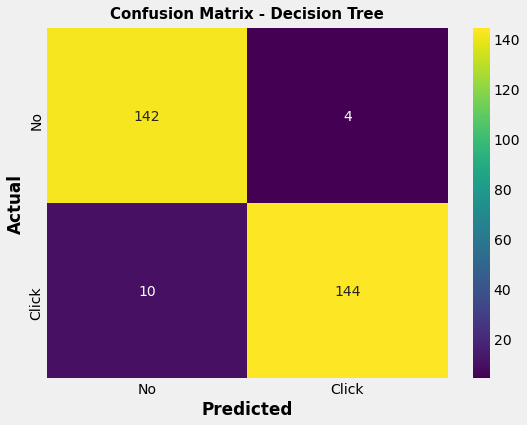

In [89]:
# Import library
from sklearn.metrics import confusion_matrix

# Initiate a Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 6, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 42)

# Model training
dt.fit(X_train_scaled, y_train)

# Model predictions
y_pred = gs.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "viridis", xticklabels= ['No', 'Click'], yticklabels=['No', 'Click'])
plt.title('Confusion Matrix - Decision Tree', pad = 10, fontweight = 'bold', fontsize = 15)
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

By using the results of *hyperparameter tuning* for the Decision Tree model, we train the model again to get a **confusion matrix** as shown above, with the following results:

- **True Positive**: Predicted to click on the ad and it turned out to be correct 144 times.
- **True Negative**: Predicted not to click on the ad and it turned out to be correct 142 times.
- **False Positive**: Predicted to click on the ad and turned out to be wrong by 4 times.
- **False Negative**: Predicted not to click on the ad and turned out to be wrong 10 times.

### 3.6. Features Importances

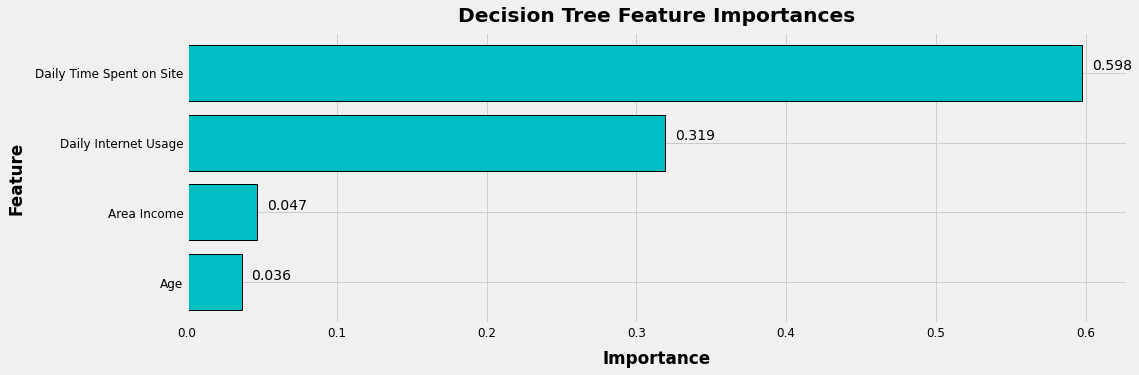

In [90]:
# Get feature importances
feature_importances = dt.feature_importances_

# Get feature names from the DataFrame
features = X_train.columns

# Create a DataFrame with feature names and importances
df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the feature from the highest importances 
df_feature_importance.sort_values('Importance', inplace = True)

# Plot the bar chart
plt.figure(figsize = (15, 5))
bars = plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='#00bfc4', linewidth = 1, edgecolor = 'black')
plt.xlabel('Importance', fontweight = 'bold', labelpad = 10)
plt.ylabel('Feature', fontweight = 'bold', labelpad = 10)
plt.title('Decision Tree Feature Importances', fontweight = 'bold', pad = 10)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)

# Add labels for each bar
for bar, label in zip(bars, df_feature_importance['Importance']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{label:.3f}', ha='center', va='bottom')

# Show the graph
plt.show()

Based on the feature importances in the image above, we can see that **Daily Time Spent on Site** is the most important feature, followed by the **Daily Internet Usage** feature in second place which determine whether **users click on ads or not**.

## 4. Business Recommendation & Simulation

### 4.1. Business Recommendation

Based on the **insight from EDA** and **feature importances**, we can provide business recommendations such as:
****
- **Content Optimization**<br>
Because the higher **Daily Time Spent on Site** and **Daily Internet Usage** the less likely user will click on ads, then we need create ad contents that are **engaging** and **relevant** to the target user and ensure that the messaging and visuals of the ads **align with the interests and needs** of the user.<br>

- **Targeted Pricing Strategies**<br>
Because the **lower** Area Income the **more likely** user will click on ads, we can implement targeted pricing strategies that **align with the income levels** of the target audience. This may involve creating **special pricing tiers**, **discounts**, or **bundled offerings**. Consider developing and promoting **affordable products** or **services** for the users with low area income.<br>

- **Age-Targeted Marketing Campaigns**<br>
Because the **older** the user the **more likely** user will click on ads, then we can develop targeted marketing campaigns specifically designed to resonate with **older demographics**. We can create the messages, visuals, and offers to align with the **preferences** and **interests** of older users.

### 4.2. Business Simulation

**Assumption:**

Cost per Mille (CPM) = Rp.100,000

Revenue per Ad Clicked  = Rp.2,000
****

**Before Using Machine Learning Model:**

- **Number of Users Advertised**:<br>
User = 1,000
- **Click-Through Rate (CTR)**: <br>
500/1,000 = 0.5
- **Total Cost**: <br>
CPM = Rp.100,000
- **Total Revenue**: <br>
CTR x Number of Users Advertised x Revenue per Ad Clicked = 0.5 x 1,000 x 2,000 = Rp.1,000,000
- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.900,000**
****

**After Using Machine Learning Model:**

- **Number of Users Advertised**:<br>
User = 1,000
- **Click-Through Rate (CTR)**: <br>
Precision = 0.95
- **Total Cost**: <br>
CPM = Rp.100,000
- **Total Revenue**: <br>
CTR x Number of Users Advertised x Revenue per Ad Clicked = 0.95 x 1,000 x 2,000 = Rp.1,900,000
- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.1,800,000**
****

**Conclusion:**<br>

From the results above, it can be seen that after we used the machine learning model, the ad performance increased. **Click-Through Rate (CTR)** increased 45% from **50% to 95%** and **total profit** increased 100% from **Rp.900,000** to **Rp.1,800,000**.

#### *Sessions and Click on Ads*

Analyzing the potential time for users who click on ads is important because it can provide valuable insights into user behavior and help companies optimize their marketing strategies.